In [4]:
#Source https://www.kaggle.com/rikdifos/credit-card-approval-prediction
fname1 = '../offline_data/application_record.csv'
fname2 = '../offline_data/credit_record.csv'
import pandas as pd

In [6]:
dfa = pd.read_csv(fname1)
dfc = pd.read_csv(fname2)

In [7]:
dfa.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
dfc.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [35]:
len(df)

777715

In [34]:
for key in df.keys():
    print(key,sum(df[key].isnull()))

ID 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
FLAG_MOBIL 0
FLAG_WORK_PHONE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 240048
CNT_FAM_MEMBERS 0
MONTHS_BALANCE 0
STATUS 0
rating 0


In [12]:
df = dfa.merge(dfc, how='inner', on='ID')

In [13]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


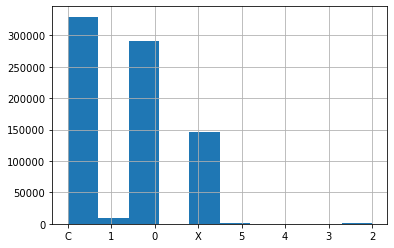

In [24]:
# C and X are good, all paid off or no loan
# 0-5 are bad 
df['STATUS'].hist()
df['rating'] = (df['STATUS'] == 'C') | (df['STATUS'] == 'X'

<AxesSubplot:>

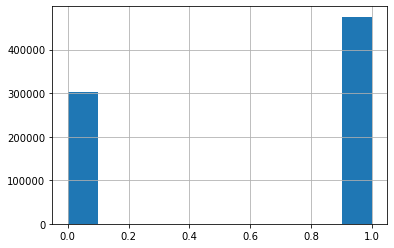

In [27]:
# 1 is good creditors
# 2 is bad creditors
df['rating'].astype(int).hist()

In [36]:
# Now logistic regression
df['CODE_GENDER'].value_counts()



F    518851
M    258864
Name: CODE_GENDER, dtype: int64

In [38]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [42]:
# data look
for key in df.keys():
    print(df[key].value_counts())

5090630    61
5148524    61
5066707    61
5061848    61
5118380    61
           ..
5024557     1
5062311     1
5024365     1
5024364     1
5041568     1
Name: ID, Length: 36457, dtype: int64
F    518851
M    258864
Name: CODE_GENDER, dtype: int64
N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64
Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64
135000.0    90217
180000.0    68579
157500.0    62686
112500.0    61622
225000.0    61399
            ...  
51750.0         7
89550.0         5
594000.0        4
151200.0        2
134995.5        2
Name: AMT_INCOME_TOTAL, Length: 265, dtype: int64
Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    524261
Highe

Try regression with
- gender F
- own car F
- own realty F
- cnt children N
- AMT income N
- Income type C (5)
- Education C (5)
- Family status (5)

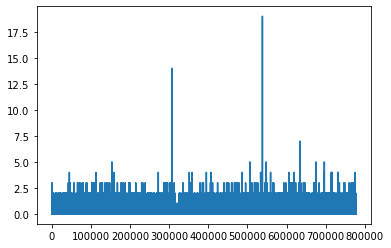

In [44]:
import matplotlib.pyplot as plt
plt.plot(df['CNT_CHILDREN'])

In [47]:
df.keys()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS', 'rating'],
      dtype='object')

In [59]:
# Clean 
dfc['flag_male'] = df['CODE_GENDER'].map(dict(M=1,F=0))
dfc['flag_mobile'] = df['FLAG_MOBIL'].map(dict(Y=1,N=0))
dfc['flag_work_phone'] = df['FLAG_WORK_PHONE'].map(dict(Y=1,N=0))
dfc['flag_mobile'] = df['FLAG_MOBIL'].map(dict(Y=1,N=0))

In [58]:
dfc.describe()

,ID,MONTHS_BALANCE,flag_male,flag_phone
count,1.048575e+06,1.048575e+06,777715.000000,0.0
mean,5.068286e+06,-1.913700e+01,0.332852,NaN
std,4.615058e+04,1.402350e+01,0.471234,NaN
min,5.001711e+06,-6.000000e+01,0.000000,NaN
25%,5.023644e+06,-2.900000e+01,0.000000,NaN
50%,5.062104e+06,-1.700000e+01,0.000000,NaN
75%,5.113856e+06,-7.000000e+00,1.000000,NaN
max,5.150487e+06,0.000000e+00,1.000000,NaN
